# Astigmatic PSF analysis
---
### Overview
1. Read PSF stack
2. Determine angle of astigmatism
3. Measure X and Y widths of PSF as function of depth and fit

#### Libraries

In [1]:
from tqdm.notebook import tqdm
import numpy as np
import psf_extractor as psfe

## Read PSF stack and metadata

In [12]:
# directory of files used as input in PSF extractor
file_pattern = '../data/sample_zstack_astigmatism/'

#read PSF stack
psf = psfe.load_stack(file_pattern+'_output/psf_av.tif')
#read pixel sizes from parameter file
psx,psy,psz = psfe.read_parameters(file_pattern)

## Determine angle of astigmatism

This is done by calculating the maximum intensity projection of the PSF (along z) and then fitting 
the sum of two ellipsoidal 2D gaussians to this, with the following constraints:
1. The minor axes and major axes of both gaussian are equal
2. The gaussians are rotated 90 degrees with respect to each other.

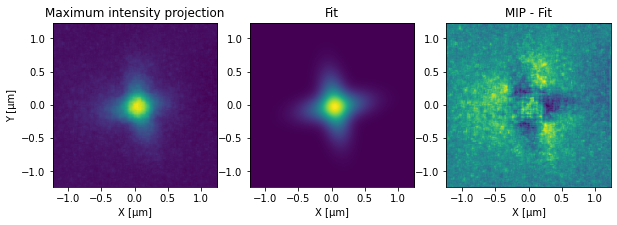

Angle of astigmatism:	 -170.5 degrees


In [57]:
#get angle:     -    optionally, first guess of theta can be supplied through: get_angle_astigmatism(psf,45)
theta, image, fit = psfe.get_angle_astigmatism(psf)  

#plot result
psfe.plot_astigm_angle_fit(image, fit, psx, psy)
